B  =  [[-1.12365279 -0.51207381  1.65037194 ... -0.62831728  1.15594554
   0.35225814]
 [-0.41372082 -0.85923446  1.74191172 ...  0.85133943  1.31556544
   0.25578198]]


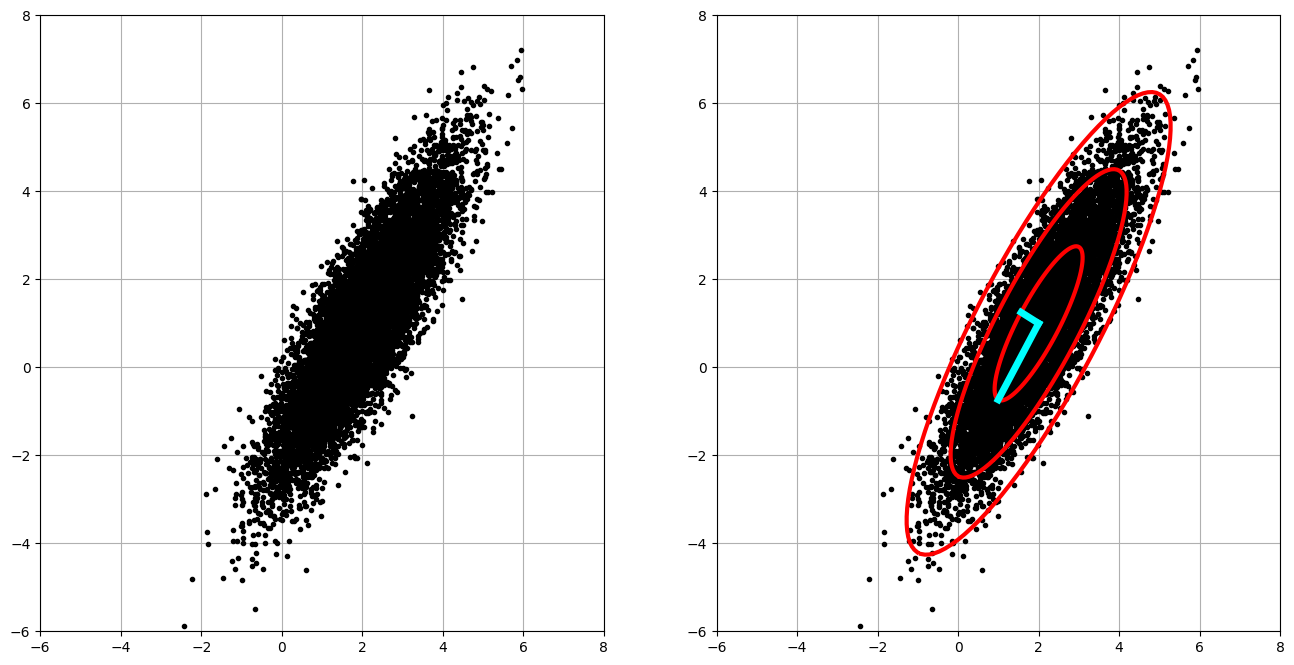

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 8]

xC = np.array([2, 1])      # Center of data (mean)
sig = np.array([2, 0.5])   # Principal axes

theta = np.pi/3            # Rotate cloud by pi/3

R = np.array([[np.cos(theta), -np.sin(theta)],     # Rotation matrix
              [np.sin(theta), np.cos(theta)]])

nPoints = 10000           # Create 10,000 points
X = R @ np.diag(sig) @ np.random.randn(2,nPoints) + np.diag(xC) @ np.ones((2,nPoints))

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:],X[1,:], 'k.')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

Xavg = np.mean(X,axis=1)                  # Compute mean
B = X - np.tile(Xavg,(nPoints,1)).T       # Mean-subtracted data

#H = np.eye(nPoints)-1/nPoints*np.ones((nPoints,nPoints)) # Centering matrix
#B1 = X@H                                                 # Mean-centered

print('B  = ',B)
#print('B1 = ',B1)

# Find principal components (SVD)
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints-1),full_matrices=0)

ax2 = fig.add_subplot(122)
ax2.plot(X[0,:],X[1,:], 'k.')   # Plot data to overlay PCA
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

theta = 2 * np.pi * np.arange(0,1,0.01)

# 1-std confidence interval
Xstd = U @ np.diag(S) @ np.array([np.cos(theta),np.sin(theta)])

ax2.plot(Xavg[0] + Xstd[0,:], Xavg[1] + Xstd[1,:],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:],'-',color='r',linewidth=3)

# Plot principal components U[:,0]S[0] and U[:,1]S[1]
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]),
         np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]),'-',color='cyan',linewidth=5)
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]),
         np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]),'-',color='cyan',linewidth=5)

plt.show()